---

# Assignment 2 - Algorithms in computational biology (INFO-F438)
## Closest duplicate

Name : Roman Lešický 

Matricule : 000608972

Version : Python 3.10.16 | packaged by conda-forge

"I coded everything myself and answered all questions without the use of AI."

---

# Libraries

In [1]:
import timeit

import matplotlib.pyplot as plt

import random

# these are required for Task 5 and 6 

---

# Task 1 & 2:

`class ST:`

`def __init__(self,s):`

`???`

`def locations(self,s):`

`???`

`def closest(self,s):`
`???`

*Complete the code above. Your goal is to have the locations and closest methods be as fast as possible, using a suffix tree. It is ok if init is relatively slow :*

(Here the reason for saying 1 and 2, is that the comments do contain some elements for the answer of Task 2, even tough an entire section is dedicated to Task 2)

In [8]:
# Here is the code to achieve Task 1, the comments in the code are here to answer Task 2 
# Here is the implementation of the "pseudo-code" that was given to us in the Overview :

class ST:

    """
    Essentially, here a nested-dictionnaires structure was chosen to recreate a "tree" like structure for fast substring searching.  
    This, method of doing Tres was suggested during the course subsequently it was also chosen to execute the second Assignment.
    
    Additionally, solving assignment 2 in this manner  allows for a rather slow initialization with the __innit__, which is traded-off for the profit 
    of a faster lookups via the use of the 'locations' and 'closest' methods, just like asked of us. This is done to respect what was asked of us in Task 1.
    
    Further technical choices will be discussed in the following sections line by line.    
    """
    
    def __init__(self, s):
        """
        Here this first method allows for the initialization of the suffix tree-like structure for a given string called "s"
        It will build a tree structure, where it starts from the root (top of the Tree) which will branch out into the 
        different nodes. Each node in this structure will store a list of position and the corresponding characters 
        from the original string "s" which was "hacked" into the different substring meaning the different suffixes.
        
        Input : 
        
        - s (str) : This is the inputted string upon which the suffix tree structure will be formed
        
        Output :
        
        - constructed tree-like structure 
        
        *Time Complexity*
        
        Essentially this method produces an O(n^2) where n is the len(s). 
        The reasoning behind this estimated time complexity is the following, here we have an outer and inner for loop.
        The outer loop runs n times since we have to look at each starting position for the string. 
        For the inner loop it also runs n times since it will iterate through the character of the suffixes with s[positions:]
        
        Additionally, other methods have also be taken into account to calculate the time complexity such as the various :
        
        - dictionary operations like lookups and creations which take on average O(1) time
        - the list appends in which also take O(1) time on average
        - the append to the root node's list adds about O(n) over the outer loop 
        
        [Average time complexity information are collected from the official wiki at https://wiki.python.org/moin/TimeComplexity]
        
        However the dominant factor to be really taken into account for the big-O time complexity calculation for the __innit__ is 
        the processing of the n suffixes where each suffix can have up to n characters and for each of these n characters we performed 
        on average constant-time operations which does result in about O(n * n) = O(n^2) overall time complexity
    
        *Space Complexity*
        
        Here for the space complexity in the worse case scenario, we store all the information about all the prefixes of all the suffixes
        which requires about also O(n^2) nodes in this tree like structure. 
        """
        
        # Here the code will store the orignal inputted string "s" in the instance variable called original string 
        self.original_string = s
        
        # This code here will allow for the creation of the tree-like structure using nested dictionaries
        # Essentially each  "node" here in this tree-like structure will be a separate dictionary with:
        
        # - 'children': a nested dictionary mapping the characters to the child nodes (one for each character)
        # - 'positions': a list storing the different indices of the suffixes from the original string
        
        self.tree = {"children": {}, "positions": []}
        
        # The Outer Loop which is responsable for the creation of the tree-like structure by the addition of the different suffixes. 
        # Here the code will loop through all the possible starting indices (aka their positions) in the inputted string "s", this 
        # does run O(n) where again n = len(s)
    
        for position in range(len(s)):
            
            # Here we start by extracting the suffix from the current "position" until we reach the end of the orignal string "s" 
            # This is essentially a slicing which takes O(n) since we are doing this for the n-position 
            current_suffix = s[position:]
            
            # Here we essentially start the root node of the tree-like structure  
            # This here is a constant time operation 
            current_node = self.tree
            
            # Here we append the current position meaning the index of current string "s" that is being slices to the node's "positions" list. 
            # Essentially this "positions" list is used to store all the indices from the original string "s" that are associated with a the 
            # path leading from the root to the "current_node". The appending to this list happens in constant-time.
            current_node["positions"].append(position)
            
            # The Inner Loop, which iterates through each character in the "current_suffix" to process it (detailed down what this actually means). 
            # There at at most n characters in the first suffix, n-1 in the 2nd, n-2 in the 3rd and so forth so here we have a O(n) time complexity at least.  

            for char in current_suffix:
                # if statement to check if this character doesn't exist as a child of the current node, we create one create one
                if char not in current_node["children"]:
                    # Just like before each new node has an empty children dictionary and position list that is attributed to it
                    # thus creating nested dictionaries to represent the tree-like structure 
                    current_node["children"][char] = {"children": {}, "positions": []}
                
                
                # if however this character does exist as a child of the current node we move to the child node that it corresponds to, 
                # then this lines of code updates the "current_node" which causes a one "branch-down" in the tree-like structure. 
                # Essentially this is how a path is created through through the tree-like structure.    
                current_node = current_node["children"][char]
                
                # And then we add the current position to the node's positions list. 
                # Essentially here we record that the character sequence which is represented by the path from the root to this particular node 
                # appears at this exact position. This append is a constant time operation.
                current_node["positions"].append(position)
        
    
    def locations(self, s):
        
        """
        Function which serves to find all the target sub-strings which appear in the originally inputted string.  
        For the sake of faithfully reproducing what was asked of us in Task 1, I am choosing to keep the parameter of this function also "s" instead of renaming it.
        Something that has to be noted here is that there the "s" represents a sub-string and not the originally string inputted sting "s". 
        
        Input : 
        
        - "s" the target substring which we want to search for
        
        Output :
        
        - list, here the output will be a numerically sorted list of all the positions where the target sub-string start in the originally inputted string.
                If the target substring is not present within the inputted string an empty list will be outputted. 
        
        *Time Complexity*
        
        Here as per Task 1 we are meant to make the fastest possible locations function. With this code a O(m) is achieved.
        
        Essentially here m is equal to the length of the target string, since we lookup the tree-like structure character by character meaning we do at most m steps with
        each dictionary lookup taking constant time. 
            
        *Space Complexity*
        
        Here the space should be equal to a O(p) space complexity where p is the number of occurrences. Since we only need to store the list of positions that 
        the code founds, and in the worst case scenario this would be equal to O(n). 
        """
        
        # if statement to handle the case scenario of a empty string case, essentially if s is empty the code returns an empty list, this is done in constant time  
        if not s:
            return []
        
        # Here to start to look-up we start at the root of the tree-like structure, this is also a constant time operation
        current_node = self.tree
        
        # For loop to iterate through each character (char) in the target string "s", this is done m times where again m is defined as the length of "s"
        for char in s:
            
            # If condition, to look at each of the iterated characters from "s", essentially if the currently looked at character isn't in the children of the current node, 
            # then the target string does not exist in the original string. Here this part is done in constant time since we are "only" doing a dictionary look-up. 
            if char not in current_node["children"]:
                return [] # here we return an empty list when we have no occurrences 
            
            # However if the character is in the children of the current node, we move our current position in the tree to the child node itself.
            # Essentially this means that we go branch-down one level deeper in the tree-like structure, but maintaining the path that corresponds to the target string.
            # This operation is done in constant time as we're performing a direct dictionary access.
            current_node = current_node["children"][char]
        
        # Return statement, which executes itself after the for loop meaning that we have found a complete match for our target string.
        # Just as a remainder if we have not found a match a return statement is already present above which will return an empty list.
        # Here what was done is that the position list at this final node contains the exact indices aka locations where our target string is situated in the orignal string.
        # Since these positions were built in the __innit__ and not here, and we are just retrieving them this is donc in constant time 
        return current_node["positions"]
    
    def closest(self, s):
        """
        Function which serves to find the closest pair of occurrences of the target substrings. The way this function works is that it first finds all the positions where the 
        target substring does occur, then it identifies the pair of consecutive positions with the minimum gap since we are searching for the closets pairs.
        
        Just as before here "s" was kept to follow precisely the overview that was provided, however, here "s" means target substring. 
        
        Input :
        
        - "s" the target substring which we want to search for
        
        Output :
        
        - a tuple (a,b), it will contain the two positions of the closest pair positions where the target substring does occur        
          or None, if it appears less than twice just as stated in the overview 
        
        *Time Complexity*
        
        Here as per Task 1 we are meant to make the fastest possible locations function. With this code a O(m + p) is achieved.
        
        Here again m is defined as m = len(s) meaning the length of the target substring and p is defined as the number of occurrences. 
        
        Essentially, finding all the positions which is done by calling the locations from the constructed tree-like structure done in __innit__ takes O(m) time.
        Iterating through the positions of the list takes to find the minimal gap this takes about O(p-1) approximated to O(p) time.
        
        Thus, the overall time complexity of this method should be O(m + p) which is achieved with the trade-off from the way the tree-structure is created within the __innit__. 
    
        *Space Complexity*
        
        Here a O(p) complexity is achieved since we only store the results from the locations() that only require the O(p) space.
        """
    
        # Firstly, we call upon locations() to find all the positions where the target substring "s" occurs, this is done in O(m) time since this is the complexity of locations() described above.
        all_positions = self.locations(s)
        
        # Just as specified within the Overview if there are fewer than 2 positions, the code should return a None
        if len(all_positions) < 2:
            return None
        
        # Here two local variables are created to tract the smallest gap and closest pair (they are named accordingly),
        smallest_gap = None # here its initialized with None but will change with the subsequent code to store the smallest distance found
        closest_pair = None # here its initialized with None but will change with the subsequent code to store the pair with the smallest distance
        
        
# For loop to check each consecutive pair of positions, this loop is executed (p-1) times where p is the number of positions
# The -1 in the range is necessary because for each index i, we're accessing both positions[i] and positions[i+1]
# This ensures we don't attempt to access an index beyond the array bounds
        
        # For loop to check for each pairs of positions that are beside each other, this loop is executed about p - 1 times (approximated to p in the time complexity estimation).
        # Here the - 1 range is required since for each index i we are accessing both the positions[i] and positions[i+1], this ensures that we don't attempt to access index an index that is out of bound.
        
        for i in range(len(all_positions) - 1): 
            
            # Here we get the current and next position since we want to "scan" the gap for positions which are beside each other, this takes constant time 
            position_current = all_positions[i] # current positions 
            position_next = all_positions[i + 1] # "next" position incremented by 1 
            
            # Very simple gap calculation where its just a subtraction of the next minus the current positions 
            gap = position_next - position_current
            
            # if statement which serves to updated our tracking of the smallest_gap variable, whenever we find a smallest gap. 
            # Since by default here smallest_gap is defined by a None, in the first iteration thi is the value of the local variable thus it has to be included in the code.
            # After this first iteration, smallest_gap will have a integer value which will be taken into account by the 'gap < smallest_gap' line of code.
            
            if smallest_gap is None or gap < smallest_gap:
                
                smallest_gap = gap # store the gap 
                closest_pair = (position_current, position_next) # store the positions 
        
        # And final return which gives te the pair with the smallest gap in a tuple format 
        return closest_pair

# Example usage just like provided in the overview example:

T = ST("aaaaabaaaabaaaaaaaaabaaaba")

print(T.locations("aba"))   # and it does produce the correct answer of [4, 9, 19, 23]

print(T.closest("aba"))     # and it does produce the correct answer of  (19, 23)


[4, 9, 19, 23]
(19, 23)


---

# Task 2 

*Describe what structure you coded and why*

Essentially, what I have been calling a tree-like structure should be called an uncompressed Suffix Trie, which has been constructed with the use of nested dictionaries in the same manner which has been shown to us during class.

The code has a Trie structure, meaning that each node is represented as a dictionary where the different indexes represent the different paths of the suffixes of the inputted string ("s", in `__init__`). Here is a difference with a compressed structure (Suffix Tree): here the code explicitly represents each character of every suffix as a separate edge. This is done without collapsing the non-branching paths, resulting in a tree that directly corresponds to each substring prefix of the suffixes. Thus, the nodes and the edges are explicit and non-compressed, meaning some redundancies are present. Consequently, each node explicitly maintains a position list containing the starting indices of all the suffixes passing through the node. This allows for rapid retrieval once the pattern node is identified when the tree-like structure has been built.

On the other hand, a more "smart" but also more complicated data structure is the Suffix Tree, which is considered a compressed variant of the Suffix Trie. This means that in Suffix Trees the information is compressed, saving on space complexity but also on time complexity—but only regarding the construction, not the search time to find an exact match.

Consequently, to produce code that aligns with the assignment's priorities—meaning producing better performance with "search" methods such as `locations()` and `closests()` with an allowed trade-off on the initial build of the tree—a data structure such as the Suffix Trie does indeed align perfectly with the constraints of this assignment.

Essentially, the `locations()` method ac achieves an $O(m)$ time complexity. The logic behind this complexity id more detailed in the comments of the code above. But as a minimal overview, this linear time is achieved since searching for a pattern p of length m involves traversing exactly m edges from the root. Each step, meaning "walking down" the tree, is done via a dictionary lookup, leading to an efficient $O(m)$ complexity. This can be achieved via the immediate access to the stored positions in the tree-like 
structure once the node is identified.

For the closests() method, here the overall complexity is approximated as $O(m+p)$, just as detailed in the comments in the code. Regardless, the general reasoning behind this approximation stems from its needs to find the specific pattern using the `locations()` method, we are already at $O(m)$. Afterwards, this method also needs to perform a linear walk-down to find the minimum gaps between the occurrences, which is done in $O(p)$, bringing the method to a more than acceptable $O(m+p)$ time complexity.

These somewhat linear times are achieved due to the trade-off with the `__init__` method, which allows the initial tree-like structure to be built. The overall time complexity for this construction is $O(n^2)$, which might be regarded as pretty bad, especially with larger input strings (n). However, just as stated in Task 1, we are allowed a slow `__init__` method in exchange for the benefits to the two search methods discussed above.

As mentioned previously, a better and more "smart" way is to use Ukkonen's implementation of Suffix Trees. This technique also allows for linear time complexity for the searching methods, but most importantly allows for $O(n)$ space and even $O(n)$ construction time complexity of the tree. However, the implementation of this method is much more complicated and does not really provide a significant advantage for this assignment, since Ukkonen's algorithm also produces linear time for the search methods, which is already provided with the current implementation of a Suffix Trie structure done in Task 1, where we are allowed a slower construction time trade-off.

In conclusion, the chosen uncompressed Suffix Trie balances simplicity in implementation while still maintaining the required fast implementation of the search methods, relying on a trade-off in the construction aspect, which is allowed by the assignment.

The information which has been gathered here has been taken from [1][2][3] sources, to be consulted in the bibliography section of this Jupyter notebook.

An additional implantation of an Ukkonen's Suffix Tree using the package called suffix_trees is done in the down just below. 


In [3]:
"""
Installation of this package is done with a simple 

* pip install suffix-trees

This can be found at this url https://pypi.org/project/suffix-trees/ 

Credit : "Python implementation of Suffix Trees and Generalized Suffix Trees" from https://github.com/ptrus/suffix-trees 
          Peter Us, Piper Chester, Zhylko Dima and Pde Blanc (the person has not specified their name)
"""

# The use of this package does not serve as a substitution for the implemented code in Task 1. 

# The use of this package serves as a mere addition for the context discussed in Task 2.
# Since with the use of this package, Ukkonen’s Algorithm to build a suffix tree can be called upon very easily.

from suffix_trees import STree

# The code here is adapted from the examples given from the https://cceh.github.io/suffix-tree/index.html (official documentation of the package)

# Here we build the tree with the STree class, here the same example is used as in Task 1 
tree = STree.STree("aaaaabaaaabaaaaaaaaabaaaba")

# Here we define "s" as the target substring, just like for the original code for Locations and Closest function in Task 1 

s = "aba"

### For locations 

all_locations_package = list(tree.find_all("aba")) # code to get the locations of "aba" from the big string 

print(sorted(all_locations_package)) 

### For Closest 

def package_closest(all_locations_package):
    """
    Function to find the closest pair of occurrences in a list of locations just as in Task 1. 
    
    # Here the exact same logic is used as in Task 1 just all_locations has been replaced by all_locations_package 
    # and we a if and else statement is used to differentiate the case scenario of less than 2 appearances 
    
    Input :
        
    - "s" the target substring which we want to search for
        
    Output :
        
    - a tuple (a,b), it will contain the two positions of the closest pair positions where the target substring does occur        
      or None, if it appears less than twice just as stated in the overview 
    """
    
    if len(all_locations_package) < 2:
        closest_pair = None

    else:

        all_locations_package.sort() # here we also need a sorting to be done, which was not required in Task 1 since 
                                 # we did that in the __innit__ but here it is required for the correct answer 
    
        # Here again we initialize the local tracking variables 
        smallest_gap = None
        closest_pair = None

        # Here we iterate through each consecutive pair of positions
        for i in range(len(all_locations_package) - 1):
            position_current = all_locations_package[i]
            position_next = all_locations_package[i + 1]

            gap = position_next - position_current

            # And we update the smallest gap and the closest pair
            if smallest_gap is None or gap < smallest_gap:
                smallest_gap = gap
                closest_pair = (position_current, position_next)

        return closest_pair
    

print(package_closest(all_locations_package))

[4, 9, 19, 23]
(19, 23)


---

# Task 3:

*Try it on several examples and convince yourself that it is correct.*

(For each example, I have it in two different cells one for the implemented and package version of the algorithm so that it's more convenant)

#### Here I am reusing the same example as professor Iocono used during class :

##### `implemented version` :

In [15]:
T = ST("mississippi")

print("Implemented method : \n")

print(T.locations("ssi")) 

print(T.closest("ssi")) 


Implemented method : 

[2, 5]
(2, 5)


##### `package version` :

In [14]:
print("Package method :\n")

tree = STree.STree("mississippi")

s = "ssi" 

### For locations 

all_locations_package = list(tree.find_all("ssi")) 

print(sorted(all_locations_package)) 

if len(all_locations_package) < 2:
    closest_pair = None

else:

    all_locations_package.sort() 
    
    smallest_gap = None
    closest_pair = None

    for i in range(len(all_locations_package) - 1):
        position_current = all_locations_package[i]
        position_next = all_locations_package[i + 1]

        gap = position_next - position_current
        
        if smallest_gap is None or gap < smallest_gap:
            smallest_gap = gap
            closest_pair = (position_current, position_next)

print(closest_pair)

Package method :

[2, 5]
(2, 5)


We have the same result from both of the methods, each of these have successfully identified that "ssi" is present at the $2nd$ and $5th$ location using Python indexes. Also there are only 2 occurrences of "ssi" therefore they are also the closest pair. 

===========================================================================================================================================================================================================================================

#### Now unto a more biologically relevant example which still remains simple so that the solution can be confirmed visually. This example is directly taken from the textbook "An Introduction to Bioinformatics Algorithms" [4] at page 324 from the Suffix Tree section :

##### `implemented version` :

In [16]:
T = ST("ATGCATACATGG")

print("Implemented method :\n")

print(T.locations("ATG")) 

print(T.closest("ATG")) 

Implemented method :

[0, 8]
(0, 8)


##### `package version` :

In [17]:
print("\nPackage method : \n")

tree = STree.STree("ATGCATACATGG")

s = "ATG" 

### For locations 

all_locations_package = list(tree.find_all("ATG")) 

print(sorted(all_locations_package)) 

if len(all_locations_package) < 2:
    closest_pair = None

else:

    all_locations_package.sort() 
    
    smallest_gap = None
    closest_pair = None

    for i in range(len(all_locations_package) - 1):
        position_current = all_locations_package[i]
        position_next = all_locations_package[i + 1]

        gap = position_next - position_current
        
        if smallest_gap is None or gap < smallest_gap:
            smallest_gap = gap
            closest_pair = (position_current, position_next)

print(closest_pair)


Package method : 

[0, 8]
(0, 8)


Just like in the previous example the two method convergence on the same answer. 

===========================================================================================================================================================================================================================================

#### Here the coded is tested on a more "real-life" situation with a FASTA sequence of length 1074 amino acids which corresponds to Phospholiase D1 protein [5]

##### `implemented version` :

In [30]:

print(len("MSLKNEPRVNTSALQKIAADMSNIIENLDTRELHFEGEEVDYDVSPSDPKIQEVYIPFSAIYNTQGFKEPNIQTYLSGCPIKAQVLEVERFTSTTRVPSINLYTIELTHGEFKWQVKRKFKHFQEFHRELLKYKAFIRIPIPTRRHTFRRQNVREEPREMPSLPRSSENMIREEQFLGRRKQLEDYLTKILKMPMYRNYHATTEFLDISQLSFIHDLGPKGIEGMIMKRSGGHRIPGLNCCGQGRACYRWSKRWLIVKDSFLLYMKPDSGAIAFVLLVDKEFKIKVGKKETETKYGIRIDNLSRTLILKCNSYRHARWWGGAIEEFIQKHGTNFLKDHRFGSYAAIQENALAKWYVNAKGYFEDVANAMEEANEEIFITDWWLSPEIFLKRPVVEGNRWRLDCILKRKAQQGVRIFIMLYKEVELALGINSEYTKRTLMRLHPNIKVMRHPDHVSSTVYLWAHHEKLVIIDQSVAFVGGIDLAYGRWDDNEHRLTDVGSVKRVTSGPSLGSLPPAAMESMESLRLKDKNEPVQNLPIQKSIDDVDSKLKGIGKPRKFSKFSLYKQLHRHHLHDADSISSIDSTSSYFNHYRSHHNLIHGLKPHFKLFHPSSESEQGLTRPHADTGSIRSLQTGVGELHGETRFWHGKDYCNFVFKDWVQLDKPFADFIDRYSTPRMPWHDIASAVHGKAARDVARHFIQRWNFTKIMKSKYRSLSYPFLLPKSQTTAHELRYQVPGSVHANVQLLRSAADWSAGIKYHEESIHAAYVHVIENSRHYIYIENQFFISCADDKVVFNKIGDAIAQRILKAHRENQKYRVYVVIPLLPGFEGDISTGGGNALQAIMHFNYRTMCRGENSILGQLKAELGNQWINYISFCGLRTHAELEGNLVTELIYVHSKLLIADDNTVIIGSANINDRSMLGKRDSEMAVIVQDTETVPSVMDGKEYQAGRFARGLRLQCFRVVLGYLDDPSEDIQDPVSDKFFKEVWVSTAARNATIYDKVFRCLPNDEVHNLIQLRDFINKPVLAKEDPIRAEEELKKIRGFLVQFPFYFLSEESLLPSVGTKEAIVPMEVWT"))

# this here is the FASTA File of Phospholipase D1, there isn't a particular reason why I chose this protein just that we were working on it for another for anoter course 

T = ST("MSLKNEPRVNTSALQKIAADMSNIIENLDTRELHFEGEEVDYDVSPSDPKIQEVYIPFSAIYNTQGFKEPNIQTYLSGCPIKAQVLEVERFTSTTRVPSINLYTIELTHGEFKWQVKRKFKHFQEFHRELLKYKAFIRIPIPTRRHTFRRQNVREEPREMPSLPRSSENMIREEQFLGRRKQLEDYLTKILKMPMYRNYHATTEFLDISQLSFIHDLGPKGIEGMIMKRSGGHRIPGLNCCGQGRACYRWSKRWLIVKDSFLLYMKPDSGAIAFVLLVDKEFKIKVGKKETETKYGIRIDNLSRTLILKCNSYRHARWWGGAIEEFIQKHGTNFLKDHRFGSYAAIQENALAKWYVNAKGYFEDVANAMEEANEEIFITDWWLSPEIFLKRPVVEGNRWRLDCILKRKAQQGVRIFIMLYKEVELALGINSEYTKRTLMRLHPNIKVMRHPDHVSSTVYLWAHHEKLVIIDQSVAFVGGIDLAYGRWDDNEHRLTDVGSVKRVTSGPSLGSLPPAAMESMESLRLKDKNEPVQNLPIQKSIDDVDSKLKGIGKPRKFSKFSLYKQLHRHHLHDADSISSIDSTSSYFNHYRSHHNLIHGLKPHFKLFHPSSESEQGLTRPHADTGSIRSLQTGVGELHGETRFWHGKDYCNFVFKDWVQLDKPFADFIDRYSTPRMPWHDIASAVHGKAARDVARHFIQRWNFTKIMKSKYRSLSYPFLLPKSQTTAHELRYQVPGSVHANVQLLRSAADWSAGIKYHEESIHAAYVHVIENSRHYIYIENQFFISCADDKVVFNKIGDAIAQRILKAHRENQKYRVYVVIPLLPGFEGDISTGGGNALQAIMHFNYRTMCRGENSILGQLKAELGNQWINYISFCGLRTHAELEGNLVTELIYVHSKLLIADDNTVIIGSANINDRSMLGKRDSEMAVIVQDTETVPSVMDGKEYQAGRFARGLRLQCFRVVLGYLDDPSEDIQDPVSDKFFKEVWVSTAARNATIYDKVFRCLPNDEVHNLIQLRDFINKPVLAKEDPIRAEEELKKIRGFLVQFPFYFLSEESLLPSVGTKEAIVPMEVWT")

print("Implemented method :\n")

# here I want to find the RL "pattern" which does not really correspond to anything just my intials (I am not a megalomaniac I was just running out of ideas and RL appeared more than once)

print(T.locations("RL")) 

print(T.closest("RL")) 

1074
Implemented method :

[399, 439, 492, 523, 955]
(492, 523)


##### `package version` :

In [29]:
print("\nPackage method :\n")

tree = STree.STree("MSLKNEPRVNTSALQKIAADMSNIIENLDTRELHFEGEEVDYDVSPSDPKIQEVYIPFSAIYNTQGFKEPNIQTYLSGCPIKAQVLEVERFTSTTRVPSINLYTIELTHGEFKWQVKRKFKHFQEFHRELLKYKAFIRIPIPTRRHTFRRQNVREEPREMPSLPRSSENMIREEQFLGRRKQLEDYLTKILKMPMYRNYHATTEFLDISQLSFIHDLGPKGIEGMIMKRSGGHRIPGLNCCGQGRACYRWSKRWLIVKDSFLLYMKPDSGAIAFVLLVDKEFKIKVGKKETETKYGIRIDNLSRTLILKCNSYRHARWWGGAIEEFIQKHGTNFLKDHRFGSYAAIQENALAKWYVNAKGYFEDVANAMEEANEEIFITDWWLSPEIFLKRPVVEGNRWRLDCILKRKAQQGVRIFIMLYKEVELALGINSEYTKRTLMRLHPNIKVMRHPDHVSSTVYLWAHHEKLVIIDQSVAFVGGIDLAYGRWDDNEHRLTDVGSVKRVTSGPSLGSLPPAAMESMESLRLKDKNEPVQNLPIQKSIDDVDSKLKGIGKPRKFSKFSLYKQLHRHHLHDADSISSIDSTSSYFNHYRSHHNLIHGLKPHFKLFHPSSESEQGLTRPHADTGSIRSLQTGVGELHGETRFWHGKDYCNFVFKDWVQLDKPFADFIDRYSTPRMPWHDIASAVHGKAARDVARHFIQRWNFTKIMKSKYRSLSYPFLLPKSQTTAHELRYQVPGSVHANVQLLRSAADWSAGIKYHEESIHAAYVHVIENSRHYIYIENQFFISCADDKVVFNKIGDAIAQRILKAHRENQKYRVYVVIPLLPGFEGDISTGGGNALQAIMHFNYRTMCRGENSILGQLKAELGNQWINYISFCGLRTHAELEGNLVTELIYVHSKLLIADDNTVIIGSANINDRSMLGKRDSEMAVIVQDTETVPSVMDGKEYQAGRFARGLRLQCFRVVLGYLDDPSEDIQDPVSDKFFKEVWVSTAARNATIYDKVFRCLPNDEVHNLIQLRDFINKPVLAKEDPIRAEEELKKIRGFLVQFPFYFLSEESLLPSVGTKEAIVPMEVWT")

s = "RL" 

all_locations_package = list(tree.find_all("RL")) 

print(sorted(all_locations_package)) 

if len(all_locations_package) < 2:
    closest_pair = None

else:

    all_locations_package.sort() 
    
    smallest_gap = None
    closest_pair = None

    for i in range(len(all_locations_package) - 1):
        position_current = all_locations_package[i]
        position_next = all_locations_package[i + 1]

        gap = position_next - position_current
        
        if smallest_gap is None or gap < smallest_gap:
            smallest_gap = gap
            closest_pair = (position_current, position_next)

print(closest_pair)


Package method :

[399, 439, 492, 523, 955]
(492, 523)


And finally, here the two methods also converge with the same answer which is a bit more complicated to find "manually," subsequently the very simple analysis helps to "convinces ourselves" that the code works on a more biologically relevant FASTA file containing actual protein information. 

In [ ]:
# Since it’s a bit more complicated to witness the correctness of the code on a larger FASTA string; here a simple indexing has been done to showcase that validity of the answer above. 

string = "MSLKNEPRVNTSALQKIAADMSNIIENLDTRELHFEGEEVDYDVSPSDPKIQEVYIPFSAIYNTQGFKEPNIQTYLSGCPIKAQVLEVERFTSTTRVPSINLYTIELTHGEFKWQVKRKFKHFQEFHRELLKYKAFIRIPIPTRRHTFRRQNVREEPREMPSLPRSSENMIREEQFLGRRKQLEDYLTKILKMPMYRNYHATTEFLDISQLSFIHDLGPKGIEGMIMKRSGGHRIPGLNCCGQGRACYRWSKRWLIVKDSFLLYMKPDSGAIAFVLLVDKEFKIKVGKKETETKYGIRIDNLSRTLILKCNSYRHARWWGGAIEEFIQKHGTNFLKDHRFGSYAAIQENALAKWYVNAKGYFEDVANAMEEANEEIFITDWWLSPEIFLKRPVVEGNRWRLDCILKRKAQQGVRIFIMLYKEVELALGINSEYTKRTLMRLHPNIKVMRHPDHVSSTVYLWAHHEKLVIIDQSVAFVGGIDLAYGRWDDNEHRLTDVGSVKRVTSGPSLGSLPPAAMESMESLRLKDKNEPVQNLPIQKSIDDVDSKLKGIGKPRKFSKFSLYKQLHRHHLHDADSISSIDSTSSYFNHYRSHHNLIHGLKPHFKLFHPSSESEQGLTRPHADTGSIRSLQTGVGELHGETRFWHGKDYCNFVFKDWVQLDKPFADFIDRYSTPRMPWHDIASAVHGKAARDVARHFIQRWNFTKIMKSKYRSLSYPFLLPKSQTTAHELRYQVPGSVHANVQLLRSAADWSAGIKYHEESIHAAYVHVIENSRHYIYIENQFFISCADDKVVFNKIGDAIAQRILKAHRENQKYRVYVVIPLLPGFEGDISTGGGNALQAIMHFNYRTMCRGENSILGQLKAELGNQWINYISFCGLRTHAELEGNLVTELIYVHSKLLIADDNTVIIGSANINDRSMLGKRDSEMAVIVQDTETVPSVMDGKEYQAGRFARGLRLQCFRVVLGYLDDPSEDIQDPVSDKFFKEVWVSTAARNATIYDKVFRCLPNDEVHNLIQLRDFINKPVLAKEDPIRAEEELKKIRGFLVQFPFYFLSEESLLPSVGTKEAIVPMEVWT"

# According to the code above "RL" starts at 399, since its two characters it starts at 399 to 400 but to represent that in Python we need to do 399:401

print(string[399:401])

# Same reasoning for the others too : 

print(string[439:441])

print(string[492:494])

print(string[523:525])

print(string[955:957])

# For when it comes to the closets :
# The distance between 399 and 439 is 40
print("\n" + str(abs(399 - 439)))

# The distance between 439 and 492 is 53
print(abs(439 - 492))

# The distance between 492 and 523 is 31
print(abs(492 - 523))

# The distance between 523 and 955 is 432 
print(abs(523 - 955))

# Therefore the winner is (492, 523) which is the correct printed answer by both methods. 

RL
RL
RL
RL
RL

40
53
31
432


---

# Task 4:

*What is the running time of each of the three methods? Express as a function of the large
string size, call it N and the small string size, call it k.*

Here $N$ is defined as the length of the large string, whilst $k$ is defined as the length of the smaller string denoting the target substring of $N$. Additionally, I will also want to talk about the $p$ notation, which represents the number of occurrences of the $k$ substring in the $N$ large string.

Essentially, the N notation is used within the `def __init__(self, s):` method, which serves to build the suffix-tree structure. In parallel here the argument $s$ of this method does correspond to $N$.

Whilst, for the `def locations(self, s):` and `def closest(self, s):` methods, the $k$ notation will be used. For these two, $k$ also does represent the argument "s", the target substring of $N$.

As previously stated, the `__init__` method is executed in quadratic $O(N^2)$ complexity time. The reason for this is the presence of the two for-loops which are necessary for this data structure. The first (outer) loop creates a new path for each suffix position from the $0th, 1st, etc.$ meaning that this loop executes N iterations. The second (inner) loop iterates up to $N - i$ times for each suffix, essentially inserting each character of the current suffix into a new nested dictionary. Hence, the major driving force of the time-complexity calculation for this method is the combination of these two loops, which results in $O(N^2)$ time complexity.

For `locations()`, the time complexity is only $O(k)$, since, given the way the tree is built, we only have to retrieve the information from it. Thus, `locations()` does not depend on $N$ but only on k; this is one dictionary lookup per character, done in $O(1)$.

For the `closest()` method, the time complexity is approximated at about $O(k+p)$. We directly call upon `locations()` in $O(k)$, whilst, additionally, this method has to scan the list of the $p$ returned positions, computing each consecutive gap in $O(p)$ time.

For further information, the code is annotated with comments for a more precise line-by-line explanation.



---

# Task 5:

*Make the following running time plots. Explain what is going on:*

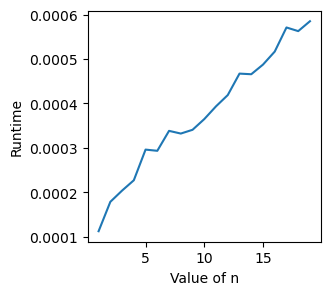

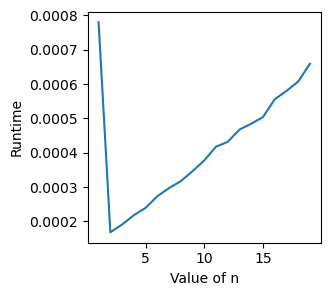

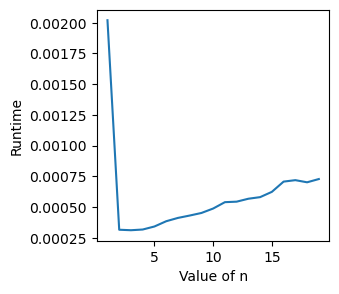

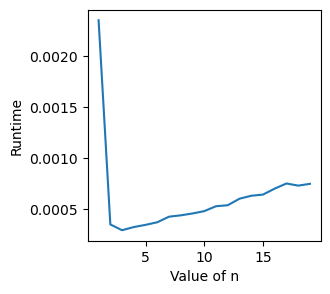

In [ ]:
def plotruntime(f,r,trials=1,figsize=[3,3]):
    Times=[timeit.timeit(lambda:f(n),number=trials)/trials for n in r]
    fig, ax = plt.subplots(figsize=figsize)
    ax.plot(r,Times)
    ax.set_xlabel("Value of n")
    ax.set_ylabel("Runtime")

def plotruntimes(functions,labels,r,trials=1,figsize=[3,3]):
    fig, ax = plt.subplots(figsize=figsize)
    for f,l in zip(functions,labels):
        Times=[timeit.timeit(lambda:f(n),number=trials)/trials for n in r]
        ax.plot(r,Times,label=l)
    ax.set_xlabel("Value of n")
    ax.set_ylabel("Runtime")
    ax.set_title("Runtime plot: "+str(trials)+" trial"+("s" if trials>1 else ""))
    ax.legend()
    
# We needed to add the randomListOfChars() function to make the code work

def randomListOfChars(length_of_string):
    """
    Function which produces a random string of the inputted length, 
    the string is composed of all the non-capitalized letters of the alphabet.
    
    Input : 
    
    - length_of_string an integer corresponding to the desired length of the string
    
    Output :
    
    - a str of the desired length    
    """
    
    return "".join(random.choice("abcdefghijklmnopqrstuvwxyz") for i in range(length_of_string)) 
  

S = randomListOfChars(1000)

T = ST(S)

k = 100 # Here I went for 100 to 100000 for longer time plots

def closestRandom(n):
    for i in range(k):
        T.closest(randomListOfChars(n))

def locationsRandom(n):
    for i in range(k):
        T.locations(randomListOfChars(n))

plotruntime(locationsRandom,range(1,20))
    
plotruntime(closestRandom,range(1,20))

# *Additional plots*

# Create a random string and build the STree

S = randomListOfChars(1000)

tree_package = STree.STree(S)

# need to redefine the 
def package_closest(all_locations_package):
    """
    Same function as in Task 2 
    """
    
    if len(all_locations_package) < 2:
        closest_pair = None

    else:

        #all_locations_package.sort() 
    
        smallest_gap = None
        closest_pair = None

        for i in range(len(all_locations_package) - 1):
            position_current = all_locations_package[i]
            position_next = all_locations_package[i + 1]

            gap = position_next - position_current

            # And we update the smallest gap and the closest pair
            if smallest_gap is None or gap < smallest_gap:
                smallest_gap = gap
                closest_pair = (position_current, position_next)

        return closest_pair

# Same logic as was provided just adapted to the package :

def locationsPackageRandom(n):
    for i in range(k):
        list(tree_package.find_all(randomListOfChars(n)))

def closestPackageRandom(n):
    for i in range(k):
        substring = randomListOfChars(n)
        all_locations_package = list(tree_package.find_all(substring))
        package_closest(all_locations_package)


plotruntime(locationsPackageRandom, range(1,20))

plotruntime(closestPackageRandom, range(1,20))

Here in Task 5, the code that we are given essentially produce a runtime analysis of the implemented code from Task 1. I have also applied it to the additional suffix tree created using the external package in Task 2 to add more detail to the analysis.

To be more speficifc, this analysis involves querying each structure for $k = 100$ times using randomly generated strings from the `randomListOfChars(n)` function, where the runtime is measured for string lengths from 1 to 19 ($n$ goes from 1 to 19).

1) `ST` code implemented in Task 1:

Primarily, for the `locationsRandom(n)` method, we observe that runtime increases gradually as the length ($n$) increases. Essentially, this confirms that the `locations()` method traverses the suffix trie character by character, resulting in an $O(m)$ linear-time complexity, where $m$ is the length of the search substring. Thus, the results support that the `locationsRandom(n)` method runs in linear or near-linear growth as the pattern size increases. 

Secondly, for the `closestRandom(n)` method, a drastic spike is observed at $n = 1$, directly followed by a sudden decrease and subsequently a gradual increase. 

If approached logically, this does make sense for the following reason. When $n = 1$, the queried substring consists of only a single character that appears frequently. Thus, runtime at this specific point is dominated by scanning multiple occurrences within the tree structure, implying a time complexity closer to $O(p)$, where $p$ represents the number of occurrences of the substring in the originally inputted string. 

However, once $n$ reaches 2 and above, the runtime sharply decreases and transitions back toward a more linear complexity, resembling the `locationsRandom(n)` behavior, dominated by the linear character-by-character traversal ($O(m)$).

2. `suffix_trees.STree` package additionally implemented in Task 2:

To make things short, both methods (`locationsPackageRandom(n)` and `closestPackageRandom(n)` ) yield very similar runtime plots to the code implemented in Task 1.

These two methods display the same initial spike as observed for the `closestRandom(n)` method in the `ST` class, for which the previous explanation also holds true.

Nontheless to be a bit more specific, `locationsPackageRandom(n)` exhibits an $O(m)$ complexity just like its counterpart in the previous class, due to a linear traversal. The same can be said for `closestPackageRandom(n)`, here the complexity is theoretically similar ($O(m + p)$) due to a linear traversal followed by scanning to find the minimum gap. However, `closestPackageRandom(n)` which requires a `.sort()` to properly function which can also hinder the performances when choosing to use the package. 

In conclusion, this empirically confirms what was previously mentioned in Task 2: a simple suffix trie data structure can achieve lookup performances very comparable to those of a more sophisticated suffix tree data structure. Thus, choosing a suffix does perfectly align with was required of us for this second assignment for the fastest possible locations and closets methods. 



---

# Task 6:

*Create this plot and comment on it:*

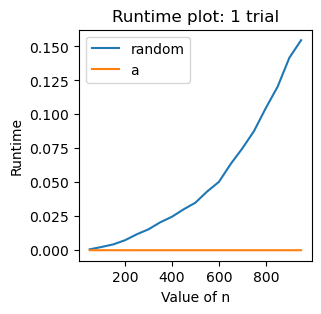

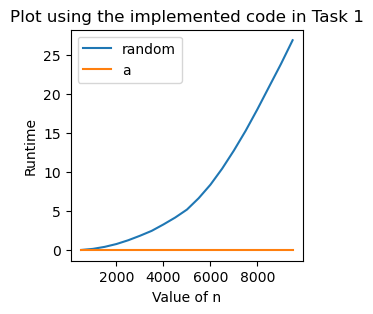

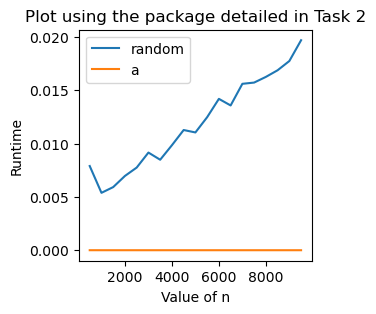

In [ ]:

def plotruntime(f, r, trials=1, figsize=[3, 3]):
    Times = [timeit.timeit(lambda: f(n), number=trials) / trials for n in r]
    fig, ax = plt.subplots(figsize=figsize)
    ax.plot(r, Times)
    ax.set_xlabel("Value of n")
    ax.set_ylabel("Runtime")

def plotruntimes(functions, labels, r, trials=1, figsize=[3, 3], title=None):
    fig, ax = plt.subplots(figsize=figsize)
    for f, l in zip(functions, labels):
        Times = [timeit.timeit(lambda: f(n), number=trials) / trials for n in r]
        ax.plot(r, Times, label=l)
    ax.set_xlabel("Value of n")
    ax.set_ylabel("Runtime")
    ax.set_title(title if title else f"Runtime plot: {trials} trial{'s' if trials > 1 else ''}") # This line has been modified so that I can add titles to the additional graphics 
    ax.legend()

def randomListOfChars(length_of_string):
    """
    Function which produces a random string of the inputted length, 
    the string is composed of all the non-capitalized letters of the alphabet.
    
    Input : 
    
    - length_of_string an integer corresponding to the desired length of the string
    
    Output :
    
    - a str of the desired length    
    """
    
    return "".join(random.choice("abcdefghijklmnopqrstuvwxyz") for i in range(length_of_string)) 

plotruntimes([lambda x:ST(randomListOfChars(x)),lambda x:"a"*x+"$"],["random",'a'],range(50,1000,50))

# *Additional plots to go further*

# Code from task 1
plotruntimes([lambda x:ST(randomListOfChars(x)),lambda x:"a"*x+"$"],["random",'a'],range(500,10000,500), title = ("Plot using the implemented code in Task 1"))

# Package
plotruntimes([lambda x:STree.STree(randomListOfChars(x)),lambda x:"a"*x+"$"],["random",'a'],range(500,10000,500), title = ("Plot using the package detailed in Task 2"))

Here in Task 6, a code that allows for a more in-depth analysis is provided for the construction time complexity performance for the implemented code in Task 1. Additionally, I have also chosen to add some supplementary plots which I will detail down.

First of all, for plot 1 meaning `plotruntimes([lambda x:ST(randomListOfChars(x)),lambda x:"a"*x+"$"],["random",'a'],range(50,1000,50))`. Here the blue curve also called "random" shows the runtime of construction from the suffix trie ST from randomly generated string of increasing length $n$. As previously said, this code allows to demonstrate that indeed the time complexity for the construction of the tree-structure in Task 1 implemented method is quadratic meaning $O(N^2)$. The orange curve here creates a string of $"a"$ character resulting in a string like $aaaa...$ without building a trie. Since the string is only created of $a$'s the runtime for the "construction" remains flat close to zero, and does serve as a benchmark against the "blue curve" to showcase that the code works and the analysis is correct.

Secondly, for the second plot meaning for the plotruntimes `([lambda x:ST(randomListOfChars(x)),lambda x:"a"*x+"$"],["random",'a'],range(500,10000,500), title = ("Plot using the implemented code in Task 1"))` here I just wanted to expand on the previous analysis with a larger input string (each value in the range got multiplied by a factor of $10$). The results in this plot only reinforced the results in plot 1, here the blue curve reached 27 seconds at $n = 9500$ really showcasing the quadratic time complexity for the trie method. For the orange curve here, we also see a seamlessly flat line near 0. The quadratic shape might not be very pronounced initially since the curve might look slightly linear at lower values, but when compared with the third plot the quadratic nature cannot be refuted.

This brings me to the third plot meaning the `plotruntimes([lambda x:STree.STree(randomListOfChars(x)),lambda x:"a"*x+"$"],["random",'a'],range(500,10000,500), title = ("Plot using the package detailed in Task 2"))` which has been done for the same values as plot 2 but with Ukkonen's algorithm to really show the benefit of using this method over a suffix trie. Here the construction time (blue curve) of the tree structure is not calculated in seconds but in milliseconds clearly outperforming the suffix trie when it comes to this aspect. The blue curve peaks at about 0.02 seconds for an $n ≈ 10000$, confirming the linear time complexity for the construction of the tree with the use of Ukkonen's algorithm. Here again the orange curve remains very close to 0.

In conclusion, here the code empirically shows what was talked about in Task 2. The suffix trie data structure has one major drawback which is underlined in this analysis, the construction time is quadratic compared to smarter methods such as Ukkonen's algorithm which performs a linear time construction. Nonetheless, for this specific assignment the use of a suffix trie does suffice since as was shown in Task 5 we are allowed for a slower construction as long as the `locations` and `closest` methods are fast.



---

# Bibliography :

1. Introduction to suffix trees | Bioinformatics lecture notes [Internet]. 2025 [cited 2025 Apr 23]. Available from: https://mpop.gitbook.io/bioinformatics-lecture-notes/string-indexing/introduction-to-suffix-trees

2. 15-451/651: Design & Analysis of Algorithms – Lecture 24: Suffix Trees and Arrays
Carnegie Mellon University. 15-451/651: Design & Analysis of Algorithms – Lecture 24: Suffix Trees and Arrays. 2018 Nov 27 [cited 2025 Apr 23]. Available from: https://www.cs.cmu.edu/~15451-f18/lectures/lec24-sufftree.pdf

3. CMSC 423: Bioinformatics – Suffix Trees
Carnegie Mellon University. CMSC 423: Bioinformatics – Suffix Trees. [cited 2025 Apr 23]. Available from: https://www.cs.cmu.edu/~ckingsf/bioinfo-lectures/suffixtrees.pdf

4. Jones NC, Pevzner PA. An Introduction to Bioinformatics Algorithms. Cambridge (MA): MIT Press; 2004. Université Virtuelle ULB for the pdf Algorithms in computational biology (INFO-F438)

5. Phospholipase D1 (Q13393 · PLD1_HUMAN) [cited 2025 Apr 23]. Available from: https://www.uniprot.org/uniprotkb/Q13393/entry

---